# Intro to Machine Learning

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

In [25]:
sales = range(1, 31) + (.5 - np.random.rand(30))
df = (pd.DataFrame({'sales': sales})
      .set_index(pd.date_range('2019-01-01', '2019-01-30', freq = 'D'))
      .sample(20)
      .sort_index()
     )
df['sales'] = df['sales'].apply(lambda x: round(x, 2))
df

,sales
2019-01-01,1.45
2019-01-02,2.03
2019-01-06,6.33
2019-01-09,9.46
2019-01-10,10.20
2019-01-11,10.98
2019-01-12,12.47
2019-01-13,12.52
2019-01-14,14.32
2019-01-15,15.37


In [26]:
df = df.resample('D').asfreq()
df

,sales
2019-01-01,1.45
2019-01-02,2.03
2019-01-03,NaN
2019-01-04,NaN
2019-01-05,NaN
2019-01-06,6.33
2019-01-07,NaN
2019-01-08,NaN
2019-01-09,9.46
2019-01-10,10.20


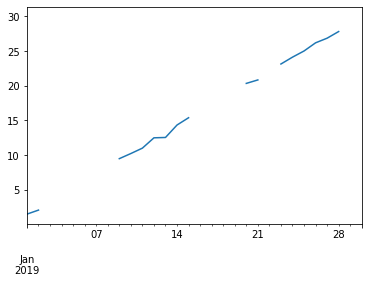

In [27]:
df['sales'].plot()

In [28]:
df2 = df.interpolate()

In [29]:
df2.head()

,sales
2019-01-01,1.450
2019-01-02,2.030
2019-01-03,3.105
2019-01-04,4.180
2019-01-05,5.255


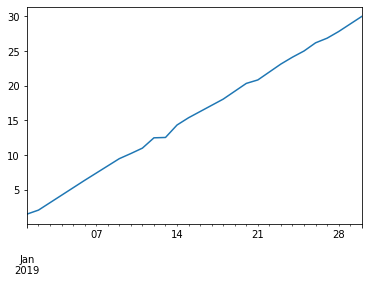

In [30]:
df2['sales'].plot()

### `datetime.toordinal()`
Returns the day count from date 01/01/01

In [31]:
df2.reset_index(inplace = True)
df2.head()

,index,sales
0,2019-01-01,1.450
1,2019-01-02,2.030
2,2019-01-03,3.105
3,2019-01-04,4.180
4,2019-01-05,5.255


In [32]:
df2['day'] = df2['index'].apply(lambda x: x.toordinal())
df2.head()

,index,sales,day
0,2019-01-01,1.450,737060
1,2019-01-02,2.030,737061
2,2019-01-03,3.105,737062
3,2019-01-04,4.180,737063
4,2019-01-05,5.255,737064


In [35]:
features = df2[['day']]
features.head()

,day
0,737060
1,737061
2,737062
3,737063
4,737064


In [36]:
target = df2[['sales']]
target.head()

,sales
0,1.450
1,2.030
2,3.105
3,4.180
4,5.255


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = .2,
    random_state = 42, # to be able to reproduce your results
)

X_train

,day
28,737088
24,737084
12,737072
0,737060
4,737064
16,737076
5,737065
13,737073
11,737071
22,737082


In [42]:
len(X_train)

24

In [43]:
X_test

,day
27,737087
15,737075
23,737083
17,737077
8,737068
9,737069


But do we want random selections for time series data?

In [44]:
i = round(df.shape[0] * .8) #Use 80% of data for training
features[:i]

,day
0,737060
1,737061
2,737062
3,737063
4,737064
5,737065
6,737066
7,737067
8,737068
9,737069


In [45]:
target[:i]

,sales
0,1.450000
1,2.030000
2,3.105000
3,4.180000
4,5.255000
5,6.330000
6,7.373333
7,8.416667
8,9.460000
9,10.200000


# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(
    features[:i],
    target[:i]
)

target[:i]


,sales
0,1.450000
1,2.030000
2,3.105000
3,4.180000
4,5.255000
5,6.330000
6,7.373333
7,8.416667
8,9.460000
9,10.200000


### `np.array.ravel()`

In [47]:
target[:i].values

array([[ 1.45      ],
       [ 2.03      ],
       [ 3.105     ],
       [ 4.18      ],
       [ 5.255     ],
       [ 6.33      ],
       [ 7.37333333],
       [ 8.41666667],
       [ 9.46      ],
       [10.2       ],
       [10.98      ],
       [12.47      ],
       [12.52      ],
       [14.32      ],
       [15.37      ],
       [16.26666667],
       [17.16333333],
       [18.06      ],
       [19.195     ],
       [20.33      ],
       [20.83      ],
       [21.98      ],
       [23.13      ],
       [24.12      ]])

In [48]:
target[:i].values.ravel()

array([ 1.45      ,  2.03      ,  3.105     ,  4.18      ,  5.255     ,
        6.33      ,  7.37333333,  8.41666667,  9.46      , 10.2       ,
       10.98      , 12.47      , 12.52      , 14.32      , 15.37      ,
       16.26666667, 17.16333333, 18.06      , 19.195     , 20.33      ,
       20.83      , 21.98      , 23.13      , 24.12      ])

In [49]:
# alternate syntax
np.ravel(target[:i].values)

array([ 1.45      ,  2.03      ,  3.105     ,  4.18      ,  5.255     ,
        6.33      ,  7.37333333,  8.41666667,  9.46      , 10.2       ,
       10.98      , 12.47      , 12.52      , 14.32      , 15.37      ,
       16.26666667, 17.16333333, 18.06      , 19.195     , 20.33      ,
       20.83      , 21.98      , 23.13      , 24.12      ])

In [50]:
features[i:] #test data

,day
24,737084
25,737085
26,737086
27,737087
28,737088
29,737089


In [51]:
#Predictions

predictions = model.predict(features[i:])
predictions

array([[25.07697464],
       [26.06801594],
       [27.05905725],
       [28.05009855],
       [29.04113986],
       [30.03218116]])

### LinearRegression().score()

    - "Returns the coefficient of determination R^2 of the prediction"
    - "Returns the coefficient of determination R^2 of the prediction"
    - "The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()"
    - R^2 is the percentage of the dependent variable's variation that a linear model explains
    - Always between 0 and 100% (higher is better)

In [52]:
model.score(
    features[i:],
    target[i:]
)

0.992186294370779

In [55]:
#Using r2_score
from sklearn.metrics import r2_score #For linear regression model

coefficient_of_dermination = r2_score(
    target[i:].values.ravel(),
    predictions
)

coefficient_of_dermination

0.9921862943707789

In [56]:
score = pd.DataFrame({
    'date': features[i:].values.ravel(),
    'actual': target[i:].values.ravel(),
    'predicted': predictions.ravel()
})

score

,date,actual,predicted
0,737084,25.01,25.076975
1,737085,26.19,26.068016
2,737086,26.86,27.059057
3,737087,27.82,28.050099
4,737088,28.91,29.041140
5,737089,30.00,30.032181


In [57]:
#u is the residual sum of squares ((y_true - y_pred) ** 2).sum()

score['residual'] = (score['actual'] - score['predicted']) ** 2
score

,date,actual,predicted,residual
0,737084,25.01,25.076975,0.004486
1,737085,26.19,26.068016,0.014880
2,737086,26.86,27.059057,0.039624
3,737087,27.82,28.050099,0.052945
4,737088,28.91,29.041140,0.017198
5,737089,30.00,30.032181,0.001036


In [58]:
# v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

score['sq_diff_mean'] = ((score['actual'] - score['actual'].mean())**2).sum()

In [59]:
# R^2 = (1 - u/v)

u = score['residual'].sum()
v = score['sq_diff_mean'].sum()
r2 = 1 - (u/v)
r2

0.9986977157284631